In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from autocorrelation_func import autocorrelation_fft, integrated_autocorr_time

## upload autocorrelation function data
home = "/scratch/yc3400/AffineInvariant/"
folder = "benchmark_results_SPDE_sample10_5_nthin10_20250425-191513/"

dims = ['4', '8','16','32','64']

names = ["Stretch Move", "Side Move", 
        "HMC n=2", "HMC n=10", 
        "Hamiltonian Walk Move n=10", "Hamiltonian Walk Move n=2",
        "Hamitonian Side Move n=10", "Hamitonian Side Move n=2"]

dict = {}

for dim in dims:
    print(dim)
    dict[dim]={}
    for name in names:
        print(name)
        tmp = "samples_" + name + ".npy"
        samples = np.load(home+folder+dim+'/' + tmp)
        dict[dim][name] = {}
        dict[dim][name]["acf"] = autocorrelation_fft(np.mean(samples[:, :, 0], axis=0))
        dict[dim][name]["act"], _, _ = integrated_autocorr_time(np.mean(samples[:, :, 0],axis=0))


4
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamitonian Side Move n=10
Hamitonian Side Move n=2
8
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamitonian Side Move n=10
Hamitonian Side Move n=2
16
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10


/home/yc3400/scratch_research/gitrepo/AffineInvariantSamplers/autocorrelation_func.py:28: RuntimeWarning: divide by zero encountered in divide
  x_norm = x_norm / np.sqrt(var)
/home/yc3400/scratch_research/gitrepo/AffineInvariantSamplers/autocorrelation_func.py:33: RuntimeWarning: invalid value encountered in multiply
  acf = np.fft.ifft(fft * np.conjugate(fft))[:n]


Hamiltonian Walk Move n=2
Hamitonian Side Move n=10
Hamitonian Side Move n=2
32
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamitonian Side Move n=10
Hamitonian Side Move n=2
64
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamitonian Side Move n=10
Hamitonian Side Move n=2


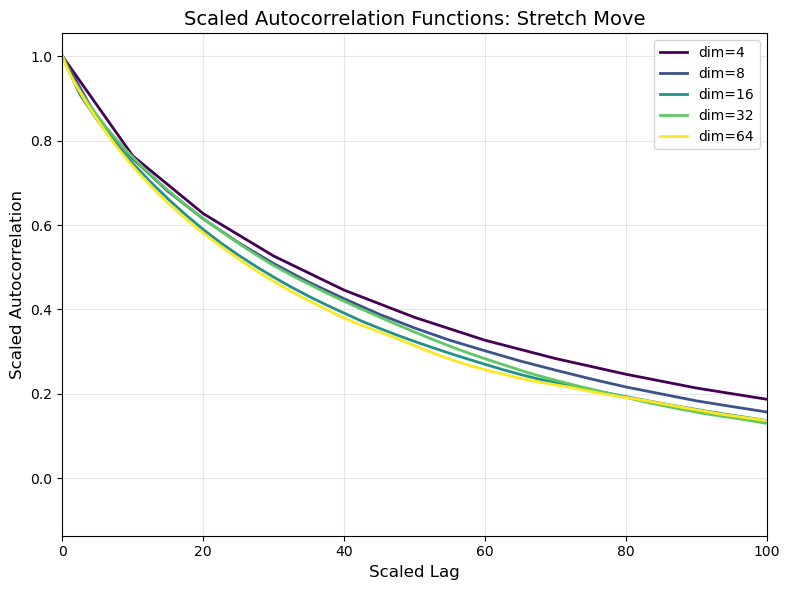

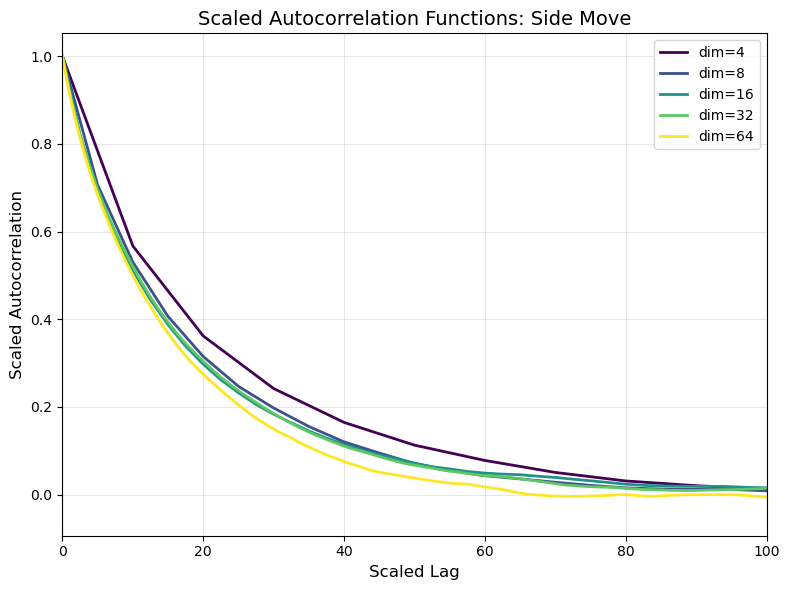

In [2]:
"""Plot autocorrelation functions for different dimensions and samplers"""
# Set up consistent colors for dimensions
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Plot for Stretch Move
plt.figure(figsize=(8, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Stretch Move"]["acf"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*10*4, acf[0:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)
    plt.xlim(0, 100)

plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Stretch Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("stretch_move_scaled_autocorrelation.pdf", dpi=300)

# Plot for Side Move
plt.figure(figsize=(8, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Side Move"]["acf"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*10*4, acf[0:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)
    plt.xlim(0, 100)
    
plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Side Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("side_move_scaled_autocorrelation.pdf", dpi=300)



KeyError: 'Hamiltonian Side Move n=10'

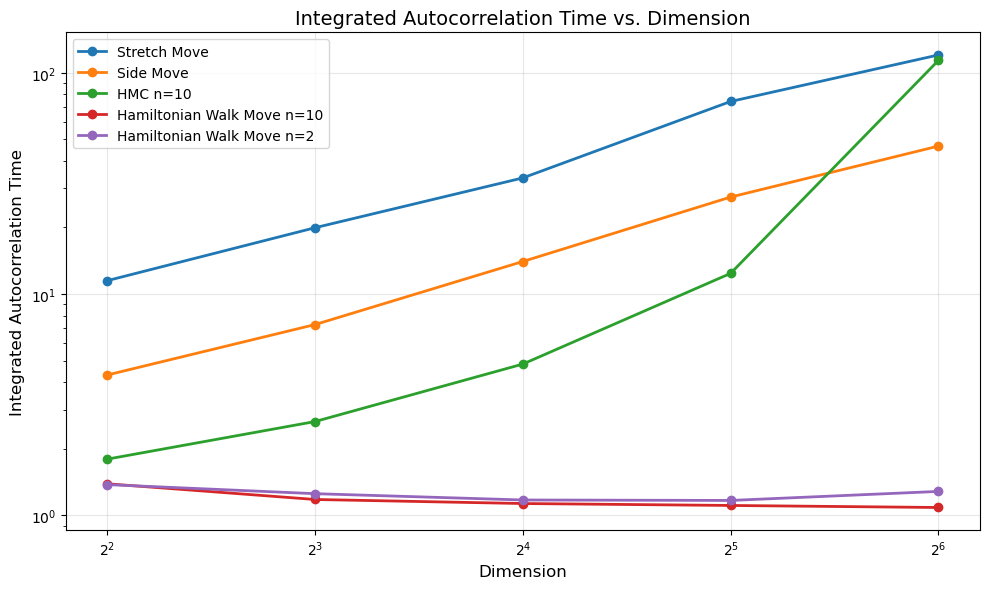

In [3]:
# Create a summary plot of integrated autocorrelation times
plt.figure(figsize=(10, 6))

names = ["Stretch Move", "Side Move", 
        "HMC n=10", 
        "Hamiltonian Walk Move n=10", "Hamiltonian Walk Move n=2",
        "Hamiltonian Side Move n=10", "Hamiltonian Side Move n=2"]

# names = ["Stretch Move", "Side Move", 
#         "HMC n=10", 
#         "Hamiltonian Walk Move n=10"]

dims_int = [int(dim) for dim in dims]
for name in names:
    act = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        act[i] = dict[dim][name]['act']
    
    plt.plot(dims_int, act, 'o-', label=name, linewidth=2)
    plt.xlabel("Dimension", fontsize=12)
    plt.ylabel("Integrated Autocorrelation Time", fontsize=12)
    plt.title("Integrated Autocorrelation Time vs. Dimension", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.tight_layout()

ref = [10, 20, 40, 80, 160, 320]
plt.plot(dims_int, ref, '--', label='reference line O(d)', linewidth=2)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log', base=2)
plt.yscale('log')
plt.tight_layout()

# plt.savefig("SPDE_integrated_autocorrelation_comparison_simpler.pdf", dpi=300)




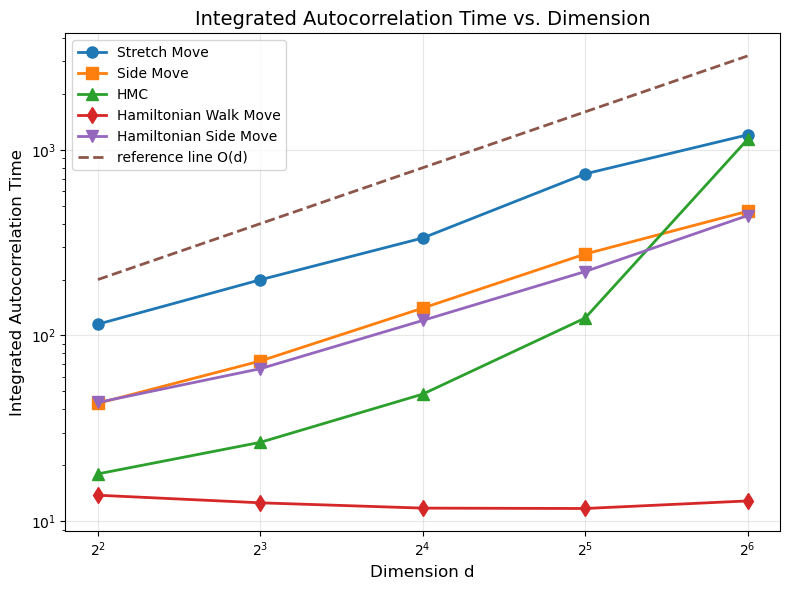

In [9]:
# Create a summary plot of integrated autocorrelation times
plt.figure(figsize=(8, 6))
names = ["Stretch Move", "Side Move", 
        "HMC n=10", 
        "Hamiltonian Walk Move n=2", "Hamitonian Side Move n=2"]
dims_int = [int(dim) for dim in dims]

# Define distinct markers for each line
markers = ['o', 's', '^', 'd', 'v']

for i, name in enumerate(names):
    act = np.zeros(len(dims))
    for j, dim in enumerate(dims):
        act[j] = dict[dim][name]['act']
    if "n=" in name:
        name = name[:name.index("n=")-1]
    if name == "Hamitonian Side Move":
        name = "Hamiltonian Side Move"
    
    # Use different marker for each line with increased marker size
    plt.plot(dims_int, act*10, marker=markers[i], markersize=8, linestyle='-', label=name, linewidth=2)

plt.xlabel("Dimension d", fontsize=12)
plt.ylabel("Integrated Autocorrelation Time", fontsize=12)
plt.title("Integrated Autocorrelation Time vs. Dimension", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log', base=2)
plt.yscale('log')
plt.tight_layout()

# Use a distinct marker for the reference line too with increased marker size
ref = np.array([10, 20, 40, 80, 160])*20
plt.plot(dims_int, ref, linestyle='--', label='reference line O(d)', linewidth=2)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log', base=2)
plt.yscale('log')
plt.tight_layout()
plt.savefig("SPDE_integrated_autocorrelation_comparison_simple.pdf", dpi=300)